In [7]:
import keras, os, pickle, re, sklearn, string, tensorflow
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras.layers import Embedding
from keras.optimizers import Adadelta, adam
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils.vis_utils  import plot_model

print('Keras version: \t\t%s' % keras.__version__)
print('Scikit version: \t%s' % sklearn.__version__)
print('TensorFlow version: \t%s' % tensorflow.__version__)


Keras version: 		2.0.9
Scikit version: 	0.19.1
TensorFlow version: 	1.4.1


In [8]:
import nltk
from nltk.corpus import stopwords
from tika import parser
from sklearn.metrics import classification_report



In [1]:
def LoadData_others():
    label_others=[]
    i=0
    for file in os.listdir("/home/shabna/Desktop/example_codes/new_sample/level4/tech/Others/others"):
        try:
            print (i, file)
            parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level4/tech/Others/others/"+file)

            tech_contents=clean_doc(parsedPDF['content'])
            #Data = resume_contents.encode('utf-8')    
            label_others.append((tech_contents,'others'))
        except UnicodeEncodeError:
            print ('Unicode error:', file)
        i=i+1
    #print (label_resume)
    return(label_others)
        

In [2]:
def LoadData_webdesigner():
    label_webdesigner=[]
    i=1
    for file in os.listdir("/home/shabna/Desktop/example_codes/new_sample/level4/tech/Others/webdesigner"):
        try:
            print (i, file)
            parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level4/tech/Others/webdesigner/"+file)
        
            it_contents=clean_doc(parsedPDF['content'])
       
            
            label_webdesigner.append((it_contents, 'webdesigner'))
        except UnicodeEncodeError:
            print ('Unicode error:', file)
        i=i+1
            
    return(label_webdesigner)

In [5]:
#Preprocessing
def clean_doc(doc):
    """
    Cleaning a document by several methods:
        - Lowercase
        - Removing whitespaces
        - Removing stopwords
        - Removing punctuations
        
    """
    stop_words = set(stopwords.words('english'))
    
    # Lowercase
    doc = doc.lower()
   
    tokens = doc.translate({ord(c):"" for c in "\u200b\uf020\u2028\xa0\uf0e0\uf095\uf041\uf0e1\uf0b7\xad"})
    tokens = tokens.translate({ord(c):" " for c in "[):,·](;•●■♦▪"})
    tokens = tokens.translate({ord(c):"f" for c in "�"})
    
    # Removing multiple whitespaces
    tokens = re.sub(r"\?", " \? ", tokens)
    
    # Split in tokens
    tokens = tokens.split()
    
    # Remove Stopwords
    tokens = [w for w in tokens if not w in stop_words]
    # Remove punctuation
    tokens = [w.translate(str.maketrans('', '', string.punctuation)) for w in tokens]
    
    return ' '.join(tokens)

In [6]:
label_others=LoadData_others()

0 RajibDebnathProfile.pdf
1 NeriinnGopuProfile(1).pdf
2 NataliaMolchanovaProfile.pdf
3 SimonaTedescoProfile.pdf
4 3d Character Animator Resume.doc
5 SagaciousDesignProfile.pdf
6 LaurenHamillProfile.pdf
7 CostantinoMontanariProfile.pdf
8 IlariaAlquatiProfile(1).pdf
9 Martina GinevraAlbanoProfile.pdf
10 LorenzoDe AngelisProfile.pdf
11 AtaHaghdarProfile.pdf
12 LorenzoDe AngelisProfile(2).pdf
13 ValerioBailo ModestiProfile.pdf
14 SoniaDonizProfile.pdf
15 StevaDokmanacProfile.pdf
16 KimberlyPelkeyProfile.pdf
17 SimonaMuscogiuriProfile.pdf
18 TureNicotraProfile.pdf
19 Ramana RaoPanduriProfile.pdf
20 ImmaPezzellaProfile.pdf
21 ZenithJ JosephProfile.pdf
22 AlexFreiProfile.pdf
23 MariaMarangoloProfile.pdf
24 REJIDHESIProfile.pdf
25 KiranMohodProfile.pdf
26 NicolaCredentinoProfile.pdf
27 SimoneAlbieriProfile.pdf
28 SaraRiscicaProfile.pdf
29 Suri.Profile.pdf
30 GianlucaBaldacciniProfile.pdf
31 Creative Resume.pdf
32 RobertaAnnicchiaricoProfile.pdf
33 IlariaAlquatiProfile.pdf
34 LaviniaBizzarriPro

In [10]:
len(label_others)

150

In [11]:
label_webdesigner=LoadData_webdesigner()

1 nilima_balkhande_Pune_1.07_yrs.doc
2 RAHUL_KUMAR_Delhi_4.08_yrs.doc
3 ankita_tailor_India_5.00_yrs.docx
4 Aravind Syam Prakash.doc
5 jasmendar_kumar_Delhi_3.00_yrs.doc
6 Saumya__Delhi_3.00_yrs.docx
7 Nagaraju_S_Mysore_4.05_yrs.doc
8 GOBI.pdf
9 Govind_Narayanan_Cochin___Kochi___Ernakulam_10.00_yrs.doc
10 Ankit_Kumar_Bengaluru___Bangalore_1.02_yrs.docx
11 Kiran.pdf
12 Anitha_P_Bengaluru___Bangalore_0.00_yrs.docx
13 naga_chaitanya_Hyderabad___Secunderabad_3.08_yrs.doc
14 Hasan_Ali_Alavudeen_Madurai_9.00_yrs.docx
15 Kalpesh_gurav_Thane_1.00_yrs.docx
16 FREDIN FRANCIS.doc
17 Raju_Jinukala_Hyderabad___Secunderabad_2.08_yrs.doc
18 Mohd_Imran_Siddiqui_Delhi_4.00_yrs.doc
19 mamatha_gogi_Hyderabad___Secunderabad_6.00_yrs.doc
20 rafia_khan_Delhi_1.00_yrs.docx
21 Harikrishnan S - Cochin _ Kochi _ Ernakulam, 3 years.pdf
22 Anand_Shendage_Mumbai_1.06_yrs.pdf
23 Nihal_Gesudraz_Bengaluru___Bangalore_4.02_yrs.pdf
24 Chandrajit_Das_Hyderabad___Secunderabad_0.00_yrs.docx
25 Neeta_Gotad_Mumbai_1.05_yrs.

In [12]:
print(len(label_webdesigner))

150


In [13]:

jdres_train_labels=[]
jdres_train_data=[]

for row in label_admin:
    jdres_train_data.append(row[0])
    jdres_train_labels.append(row[1])
#print(jdres_train_data)

#print(len(jdres_train_data))

In [14]:
#print(jdres_train_labels)

In [15]:

for row in label_webdesigner:
    jdres_train_data.append(row[0])
    jdres_train_labels.append(row[1])
#print(jdres_train_labels)
#print(jdres_train_data)

In [16]:
print(len(jdres_train_data))
print(len(jdres_train_labels))

300
300


In [17]:
#print(jdres_train_data[42])

In [18]:
encoded_labels = [0 for _ in range(len(label_admin))] + [1 for _ in range(len(label_webdesigner))]
#print(labels)
print(len(encoded_labels))

300


In [19]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(jdres_train_data)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(jdres_train_data)
vocab_size

16270

In [21]:
# pad documents to a max length of 500 words
max_length = 500
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[   12    17  3213 ...,     0     0     0]
 [   12    17  2614 ...,     0     0     0]
 [   12    17  3220 ...,     0     0     0]
 ..., 
 [16211   675 16212 ...,     0     0     0]
 [  279    50  6674 ...,     0     0     0]
 [ 6679   531     8 ...,     0     0     0]]


In [22]:
labels = to_categorical(encoded_labels,num_classes=2)
print(len(labels))
labels

300


array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,

In [23]:
print('Shape of data tensor:', padded_docs.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (300, 500)
Shape of label tensor: (300, 2)


In [24]:
indices = np.arange(padded_docs.shape[0])
np.random.shuffle(indices)
padded_docs = padded_docs[indices]
labels = labels[indices]

In [25]:
#loading glove

embeddings_index = dict()
f = open('/home/shabna/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [26]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [27]:
#create model

from keras.layers import Activation, Input, Dense, Flatten, Dropout, Embedding
from keras.layers import Conv1D, MaxPooling1D,GlobalMaxPooling1D
from keras.models import Model

In [28]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [29]:
def create_model():
    model = Sequential()
    e = Embedding(vocab_size,100, weights=[embedding_matrix], input_length=500, trainable='true')
    model.add(e)
    model.add(Conv1D(100,5, activation='relu',name='l1'))
    model.add(MaxPooling1D(pool_size=5,name='l2'))
    model.add(Conv1D(100, 5, activation='relu',name='l3'))
    model.add(GlobalMaxPooling1D(name='l4'))
    #model.add(Dense(100, activation='relu',name='l5'))
    model.add(Dropout(0.2))
    #model.add(Flatten())
    model.add(Dense(2, activation='softmax',name='l6'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return model

In [30]:

model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          1627000   
_________________________________________________________________
l1 (Conv1D)                  (None, 496, 100)          50100     
_________________________________________________________________
l2 (MaxPooling1D)            (None, 99, 100)           0         
_________________________________________________________________
l3 (Conv1D)                  (None, 95, 100)           50100     
_________________________________________________________________
l4 (GlobalMaxPooling1D)      (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
l6 (Dense)                   (None, 2)                 202       
Total para

In [ ]:
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

param_grid = dict(learn_rate=learn_rate, momentum=momentum, batch_size=batch_size, epochs=epochs,optimizer=optimizer)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
    grid_result = grid.fit(X_train, y_train,validation_data=(X_val,y_val))
    
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

In [31]:
from keras.callbacks import ModelCheckpoint

In [32]:
from keras.callbacks import Callback

In [33]:
filepath="/home/shabna/Desktop/example_codes/weights_4_3.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only="True", mode="max")
callbacks_list = [checkpoint]

In [34]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

XX_train, X_test, yy_train, y_test = train_test_split(padded_docs, labels, test_size=0.2, random_state=42)

i=1
for train_index, test_index in kf.split(XX_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    print(i,":num of fold")

    X_train, X_val = XX_train[train_index], XX_train[test_index]
    y_train, y_val = yy_train[train_index], yy_train[test_index]
    
    history = model.fit(X_train, y_train, validation_data=(X_val,y_val) ,epochs=50, batch_size=100, verbose=1, callbacks=callbacks_list)
   
    i=i+1
    

1 :num of fold
Train on 160 samples, validate on 80 samples
Epoch 1/50
160/160 [==============================] - 14s 87ms/step - loss: 0.7134 - acc: 0.5625 - val_loss: 0.7003 - val_acc: 0.4750
Epoch 2/50
160/160 [==============================] - 5s 33ms/step - loss: 0.5352 - acc: 0.7187 - val_loss: 0.4374 - val_acc: 0.7875
Epoch 3/50
160/160 [==============================] - 5s 33ms/step - loss: 0.3286 - acc: 0.8750 - val_loss: 0.3153 - val_acc: 0.9375
Epoch 4/50
160/160 [==============================] - 5s 33ms/step - loss: 0.2261 - acc: 0.9313 - val_loss: 0.3537 - val_acc: 0.8125
Epoch 5/50
160/160 [==============================] - 6s 37ms/step - loss: 0.1677 - acc: 0.9250 - val_loss: 0.2533 - val_acc: 0.9125
Epoch 6/50
160/160 [==============================] - 6s 35ms/step - loss: 0.1179 - acc: 0.9750 - val_loss: 0.1922 - val_acc: 0.9750
Epoch 7/50
160/160 [==============================] - 6s 34ms/step - loss: 0.0890 - acc: 0.9875 - val_loss: 0.1721 - val_acc: 0.9750
Epoch 8/

Epoch 32/50
160/160 [==============================] - 5s 34ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0706 - val_acc: 0.9750
Epoch 33/50
160/160 [==============================] - 5s 31ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0713 - val_acc: 0.9750
Epoch 34/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.0710 - val_acc: 0.9750
Epoch 35/50
160/160 [==============================] - 5s 34ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.0706 - val_acc: 0.9750
Epoch 36/50
160/160 [==============================] - 6s 35ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0703 - val_acc: 0.9750
Epoch 37/50
160/160 [==============================] - 5s 34ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.0691 - val_acc: 0.9750
Epoch 38/50
160/160 [==============================] - 5s 33ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.0671 - val_acc: 0.9750
Epoch 39/50
160/160 [==============================] - 5s 33ms

Epoch 46/50
160/160 [==============================] - 3s 19ms/step - loss: 4.6908e-04 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 47/50
160/160 [==============================] - 3s 20ms/step - loss: 6.1350e-04 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 48/50
160/160 [==============================] - 3s 19ms/step - loss: 3.3006e-04 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 49/50
160/160 [==============================] - 3s 19ms/step - loss: 3.8483e-04 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 50/50
160/160 [==============================] - 3s 18ms/step - loss: 4.0916e-04 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
3 :num of fold
Train on 160 samples, validate on 80 samples
Epoch 1/50
160/160 [==============================] - 3s 19ms/step - loss: 8.7959e-04 - acc: 1.0000 - val_loss: 1.6079e-04 - val_acc: 1.0000
Epoch 2/50
160/160 [==============================] - 3s 20ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1

In [35]:
model=load_model("weights_4_3.best.hdf5")


In [31]:
plot_model(model, to_file = 'models4_3.png')

In [36]:
y_train

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred,axis=1)

In [39]:
y_pred = model.predict_classes(X_test)

60/60 [==============================] - 0s 5ms/step


In [40]:
p = model.predict_proba(X_test)

60/60 [==============================] - 0s 5ms/step


In [41]:
model.evaluate(X_test,y_test)

60/60 [==============================] - 1s 8ms/step


[0.065507286290327704, 0.98333334128061933]

In [42]:
model.evaluate(X_train,y_train)

160/160 [==============================] - 1s 5ms/step


[0.018944779504090549, 0.99375000000000002]

In [43]:
labels_index = {'Others':0 ,'webdesigner':1}
target_name = [t for t in labels_index.keys()]

In [44]:
print(classification_report(np.argmax(y_test,axis=1),y_pred,target_names=target_name))

             precision    recall  f1-score   support

     Others       1.00      0.97      0.98        29
webdesigner       0.97      1.00      0.98        31

avg / total       0.98      0.98      0.98        60



In [46]:
#print(classification_report(np.argmax(y_train,axis=1),y_pred1,target_names=target_name))

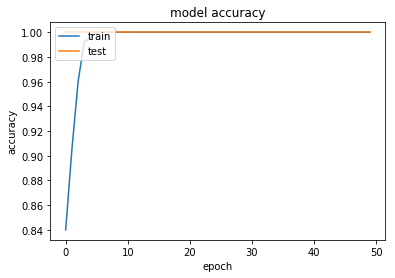

In [174]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

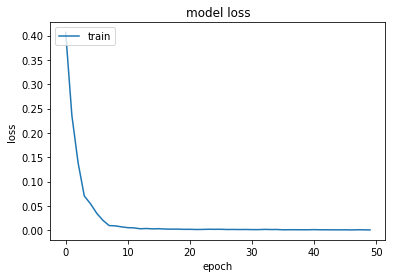

In [175]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [187]:
#predictions

#parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level4/tech/Others/others/Graphic Assistant.docx")
#parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level4/tech/Others/others/IlariaAlquatiProfile.pdf")
#parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level4/tech/Others/others/Manuele R.PennisiProfile.pdf")
#parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level4/tech/Others/others/KarolinaBednorzProfile.pdf")
parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level4/tech/Others/others/IlariaPerversiProfile.pdf")

#parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level4/tech/Others/webdesigner/Govardhan S.docx")
#parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level4/tech/Others/webdesigner/nikhil cv.doc")
#parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level4/tech/Others/webdesigner/Rohit K.doc")
#parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level4/tech/Others/webdesigner/Rafeeque.doc")
#parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level4/tech/Others/webdesigner/PYARILAL.doc")

contents=[clean_doc(parsedPDF['content'])]
            #print (jd_contents)
print(contents)

['page 1 ilaria perversi freelance illustratorcharacter designer summary hi everybody im ilaria nice meet you im working freelance illustrator character designer find works benetilariaperversi 2014 founded studio morsi partner angelo mozzillo motion graphic animated gifs advertisement short movies illustration bread butter create stories design characters explain company promote event… much more let’s get touch clients include vorwerk italia fondazione accenture tedx fom studio ocean butterflies international story group crearts aic yt http bitly21ozet9 wwwstudiomorsiit experience illustratore freelance gennaio 2017  present co founder marzo 2014  present indipendent studio focused animationillustration motion graphic animated gifs short movies illustration bread butter create stories design characters explain company promote event… much more education civica scuola di cinema di milano diploma digital animation 20112014 liceo linguistico gaetana agnesi diploma 20062011 page 2 honors aw

In [188]:
def prpInput(pp):
    tx = Tokenizer()
    tx.fit_on_texts(pp)
    vocab_size = len(tx.word_index)+1
    encoded_docs = tx.texts_to_sequences(pp)
    max_length = 500
    padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
    return padded_docs

In [189]:
mat=prpInput(contents)
mat

array([[  5,  37,   1,  10,   2,  11,   6,  38,  39,  40,  12,   1,  41,
         42,  43,  12,  44,   2,  45,  46,   6,  47,  48,  49,   3,  50,
          7,  51,  52,  53,  54,  13,  14,  15,  16,  55,  17,  18,  19,
         20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,   7,  67,  68,
         69,  70,  71,  72,  73,  74,  32,  75,  76,  77,  78,   2,  79,
         80,  33,  81,  82,  83,   3,  33,  84,   7,  85,  86,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  87,  88,  89,  34,  90,  34,  91,  35,  92,
         93,  94,  95,  96,  97,  98,  35,  99,   5, 100, 101, 102, 103,
          8, 104,   4,  36, 105,   9, 106, 107,   8, 108, 109,   9,   4,
        110, 111,   4, 112,   3,   9, 113, 114,   8, 115,   4,  36,   3,
          5, 116,   1,  10,   2,  11,   6, 117,   1, 118,  32, 119,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [190]:
prd = model.predict(mat)


In [191]:
labels_index = {'Others':0 ,'webdesigner':1}
rev_lable_index = {}
for key in labels_index:
    rev_lable_index[labels_index[key]] = key
print(rev_lable_index)
def result(prd,contents):
    y_classes = prd.argmax(axis=-1)
    print(len(y_classes))
    lx=[]
    for idx,lb in enumerate(y_classes):
        lx.append([contents[idx],rev_lable_index[lb]])
    return lx

{0: 'Others', 1: 'webdesigner'}


In [192]:
result(prd,contents)

1


[['page 1 ilaria perversi freelance illustratorcharacter designer summary hi everybody im ilaria nice meet you im working freelance illustrator character designer find works benetilariaperversi 2014 founded studio morsi partner angelo mozzillo motion graphic animated gifs advertisement short movies illustration bread butter create stories design characters explain company promote event… much more let’s get touch clients include vorwerk italia fondazione accenture tedx fom studio ocean butterflies international story group crearts aic yt http bitly21ozet9 wwwstudiomorsiit experience illustratore freelance gennaio 2017  present co founder marzo 2014  present indipendent studio focused animationillustration motion graphic animated gifs short movies illustration bread butter create stories design characters explain company promote event… much more education civica scuola di cinema di milano diploma digital animation 20112014 liceo linguistico gaetana agnesi diploma 20062011 page 2 honors a

In [193]:
import pandas as pd
pd.DataFrame(result(prd,contents),columns=['File Content','Label'])

1


,File Content,Label
0,page 1 ilaria perversi freelance illustratorch...,Others


In [220]:
print(confusion_matrix(np.argmax(y_test,axis=1),y_pred))

[[91  5]
 [11 93]]
